# 星火预习题目

⛔️ 内部资料，严禁转发

可通过[Tensorcircuit官方文档](https://tensorcircuit.readthedocs.io)等来源查询并学习包括符号意义、API使用方法等信息。

1-4 的题目最好在正式参与星火活动前完成，有余力这也可以尝试选做题。

## 1 环境配置

创建并激活一个 Python 3.8以上的环境, 通过以下方式安装 TensorCircuit:

pip install "tensorcircuit[cloud]"

并测试如下代码：

data: {'1': 523, '0': 501}
detail info: {'id': '27aed574-1030-4791-b34f-0c4fdae6dd89', 'state': 'completed', 'at': 1721747154009603.2, 'shots': 1024, 'device': 'testing', 'results': {'0': 501, '1': 523}}
   ┌───┐┌───────┐
q: ┤ H ├┤ Rz(0) ├
   └───┘└───────┘


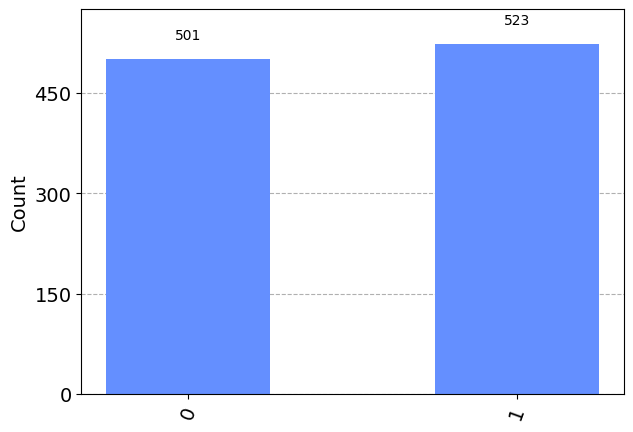

In [11]:
import tensorcircuit as tc
from tensorcircuit.cloud import apis
apis.set_provider("local")

# 调用本地code进行电路模拟
c = tc.Circuit(1)
c.H(0)
c.rz(0, theta=0)
U = c.matrix() # 量子门电路对应的矩阵
states = c.state() # 输出量子态
t = apis.submit_task(circuit=c, device="testing", shots=1024)
data = t.results(blocked=True) #产生0，1态的结果分布
print('data:', data)
detail = t.details() # 产生详细的参数信息
print("detail info:", t.details())

print(c.draw()) #电路可视化图像输出,可选 c.draw(output='mpl')
counts = t.results()
tc.results.counts.plot_histogram(counts) #柱状结果分布

## 2 向量和矩阵

考虑初始向量 $ v=(1, 0) $ ，给定二维矩阵 $$R(\theta) = \begin{pmatrix} \cos\theta &\sin\theta \\ -\sin\theta & \cos\theta \end{pmatrix}$$，
利用 Numpy 程序实现矩阵乘向量的计算 $v'=R(\theta)v$。通过可视化找到这一向量变化的几何意义。

### 2-2 矩阵指数

理解矩阵指数的含义，程序实现 $e^{i \hat P}$, $\hat{P}=\sigma_x, \sigma_y, \sigma_y$. $\sigma_x, \sigma_y, \sigma_y$ 是 $2*2$ 泡利矩阵。

考虑泰勒级数展开，试证明 $e^{i\theta\hat{P}} = \cos(\theta) I + \mathrm{i}\sin(\theta) \hat{P}$，并程序验证该公式的正确性。

根据解析证明，讨论以上矩阵欧拉公式成立对矩阵 $\hat{P}$ 形式的限制。

### 2-3 矩阵关于向量的期望

定义矩阵 $\hat{Q}$ 关于列向量 $v$ 的期望为以下标量：$$v^\dagger \hat{Q} v$$。
考虑 $v(\theta)=e^{i\theta/2\hat{P}}v_0$, $v_0=(1, 0)$, 且 $\hat{P}, \hat{Q}$ 均是泡利矩阵，实现程序计算该期望。

函数前两个输入为 0,1,2 之一的整数，分别确定 P 和 Q 是哪一个泡利矩阵，第三个输入为参数浮点数 $\theta$, 函数的输出为$\hat{Q}$在$\hat{v}$上的期望值。

可视化出不同泡利矩阵组合下期望随参数$\theta$变化的曲线，讨论其规律。

### 2-4 张量积

理解矩阵张量积的含义，$X\otimes I\otimes I\otimes Z$ 可简记为 $X_0Z_3$。
程序生成如下矩阵（输入 n）：

$$H = \sum_{i=0}^{n-1} Z_i\otimes I_{n-i-1} + \sum_{i=0}^{n-2} X_i\otimes I_{n-i-1}X_{i+1}\otimes I_{n-i} ,$$

并求该矩阵 $H$ 在向量 $(1,0,0,....)$ 下的期望值。

### 2-5 狄拉克符号

记列向量 $\vert 0\rangle = \begin{pmatrix}1\\0 \end{pmatrix}$, $\vert 1\rangle = \begin{pmatrix}0\\1 \end{pmatrix}$, $\vert 00\rangle = \begin{pmatrix}1\\0\\0\\0 \end{pmatrix}$，尝试用 Dirac 符号的语言，重写上述小节涉及的矩阵关系和定义式。并写出 $\frac{1}{\sqrt{2}}(\vert 010\rangle -\vert 101\rangle)$ 代表的列向量。

## 3 测量

### 3-1 线路期望计算

Q: 给定以下线路，试利用 TensorCircuit API 计算其期望 $\langle Z_0Z_1 \rangle$。

In [13]:
c = tc.Circuit(2)
c.h(0)
c.cx(0, 1)
c.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

A: 利用c.state()求得量子态或对应的密度矩阵$\rho$，利用$\langle Z_0Z_1 \rangle=Tr(\rho Z_0Z_1)$计算可得。

### 3-2 基于测量结果近似期望

Q: 利用 TensorCircuit API 对以上线路进行若干次测量，得到一些 0 1 的比特串的结果，并尝试利用这些测量的 bitstring 来估计期望 $\langle Z_0Z_1 \rangle$。

A: ZZ对角元上相应的基矢为，00，01，10，11，矩阵元或本征值为1，-1，-1，1，将bitstring中相应的基矢转换为prob，与本征值进行加权平均即可。